In [56]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

         player_name         club    position  minutes_played  match_played  \
0           Courtois  Real Madrid  Goalkeeper            1230            13   
1    Vinícius Júnior  Real Madrid     Forward            1199            13   
2            Benzema  Real Madrid     Forward            1106            12   
3             Modrić  Real Madrid  Midfielder            1077            13   
4       Éder Militão  Real Madrid    Defender            1076            12   
..               ...          ...         ...             ...           ...   
742         Gil Dias      Benfica  Midfielder               1             1   
743  Rodrigo Ribeiro  Sporting CP     Forward               1             1   
744         Cojocari      Sheriff    Defender               1             1   
745         Maouassa  Club Brugge    Defender               1             1   
746          Zesiger   Young Boys    Defender               1             1   

     goals  assists distance_covered  ballon_dor_sc

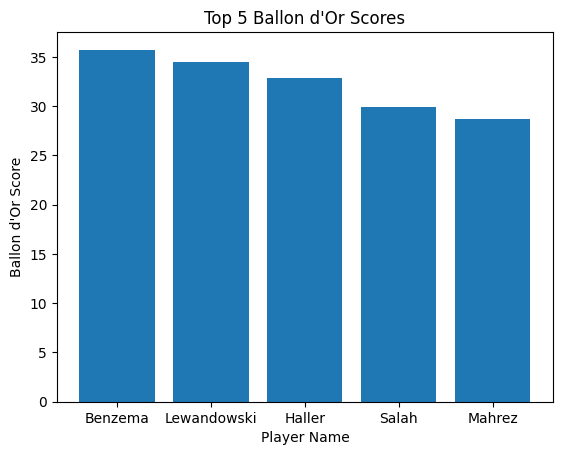

In [57]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('key_stats.csv')

data.head(10)

# Define the input variables and their membership functions
skill_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Goals')
skill_level['low'] = fuzz.trimf(skill_level.universe, [0, 0, 50])
skill_level['medium'] = fuzz.trimf(skill_level.universe, [0, 50, 100])
skill_level['high'] = fuzz.trimf(skill_level.universe, [50, 100, 100])

team_performance = ctrl.Antecedent(np.arange(0, 101, 1), 'Assists')
team_performance['low'] = fuzz.trimf(team_performance.universe, [0, 0, 50])
team_performance['medium'] = fuzz.trimf(team_performance.universe, [0, 50, 100])
team_performance['high'] = fuzz.trimf(team_performance.universe, [50, 100, 100])

# Define the output variable and its membership functions
ballon_dor_score = ctrl.Consequent(np.arange(0, 101, 1), 'Ballon d\'Or Score')
ballon_dor_score['low'] = fuzz.trimf(ballon_dor_score.universe, [0, 0, 50])
ballon_dor_score['medium'] = fuzz.trimf(ballon_dor_score.universe, [0, 50, 100])
ballon_dor_score['high'] = fuzz.trimf(ballon_dor_score.universe, [50, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(skill_level['low'] | team_performance['low'], ballon_dor_score['low'])
rule2 = ctrl.Rule(skill_level['medium'] | team_performance['medium'], ballon_dor_score['medium'])
rule3 = ctrl.Rule(skill_level['high'] | team_performance['high'], ballon_dor_score['high'])

# Create the control system
ballon_dor_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create the simulation object and simulate the system
ballon_dor_sim = ctrl.ControlSystemSimulation(ballon_dor_ctrl)

for i in range(len(data)):
    ballon_dor_sim.input['Goals'] = data.iloc[i]['goals']
    ballon_dor_sim.input['Assists'] = data.iloc[i]['assists']
    ballon_dor_sim.compute()
    data.loc[i, 'ballon_dor_score'] = ballon_dor_sim.output['Ballon d\'Or Score']
    max_row = data.loc[data['ballon_dor_score'].idxmax()]
# Print the results
print(data)


for i in range(len(data)):
    ballon_dor_sim.input['Goals'] = data.iloc[i]['goals']
    ballon_dor_sim.input['Assists'] = data.iloc[i]['assists']
    ballon_dor_sim.compute()
    data.loc[i, 'ballon_dor_score'] = ballon_dor_sim.output['Ballon d\'Or Score']

# Sort the data by the predicted Ballon d'Or score in descending order
data = data.sort_values('ballon_dor_score', ascending=False)

# Print the ranking
print('Ranking of players by predicted Ballon d\'Or score:')
print(data[['player_name', 'ballon_dor_score']])

print('Maximum Ballon score:', max_row['ballon_dor_score'])
print('Row with maximum Ballon score:\n', max_row)

plt.bar(data.head(5)['player_name'], data.head(5)['ballon_dor_score'])
plt.title('Top 5 Ballon d\'Or Scores')
plt.xlabel('Player Name')
plt.ylabel('Ballon d\'Or Score')
plt.show()
